In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sukku = pd.read_csv(r"C:\Users\SUKRUTI\Desktop\Mall_Customers.csv")

In [3]:
sukku.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
sukku.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
X = sukku[["Annual Income (k$)","Spending Score (1-100)"]].values

In [6]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [7]:
from sklearn.cluster import KMeans
kmeans=None
wcss=[]
for i in range(1,11):
    global kmeans
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=101)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

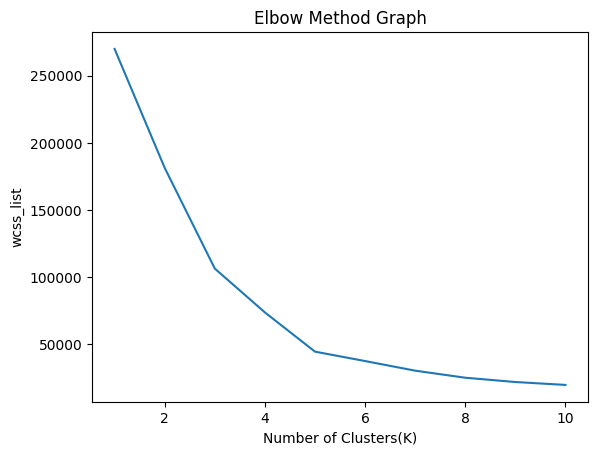

In [9]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method Graph")
plt.xlabel("Number of Clusters(K)")
plt.ylabel("wcss_list")
plt.show()

In [10]:
fkmeans=KMeans(n_clusters=5,init='k-means++',random_state=101)
ykmeans=fkmeans.fit_predict(X)
print(ykmeans)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


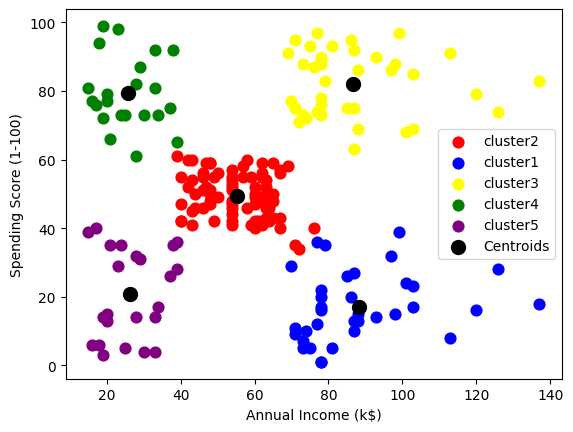

In [11]:
plt.scatter(X[ykmeans==0,0],X[ykmeans==0,1],s=60,c="red",label="cluster2")
plt.scatter(X[ykmeans==1,0],X[ykmeans==1,1],s=60,c="blue",label="cluster1")
plt.scatter(X[ykmeans==2,0],X[ykmeans==2,1],s=60,c="yellow",label="cluster3")
plt.scatter(X[ykmeans==3,0],X[ykmeans==3,1],s=60,c="green",label="cluster4")
plt.scatter(X[ykmeans==4,0],X[ykmeans==4,1],s=60,c="purple",label="cluster5")
plt.scatter( fkmeans.cluster_centers_[:, 0], fkmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)') 
plt.legend() 
plt.show()